In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
                                        cross_val_predict, cross_val_score

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import utils

import warnings
warnings.filterwarnings('ignore')

## Load data

### Iris

In [18]:
ds_name = 'Iris'
out_path = '../out_bag/out_iris/'
iris = pd.read_csv("../data/iris.data", sep=",")
iris_X = iris.drop(columns=['Class']).to_numpy()
iris_y = iris['Class'].to_numpy()
#utils.plot_dataset(iris, 'Class')

#print("=== Before pre-process ===")
#utils.describe(ireis_X)

data_X = utils.normalize(iris_X)
#data_X = iris_X
data_y = iris_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Glass

In [39]:
ds_name = 'Glass'
out_path = '../out_bag/out_glass/'
glass = pd.read_csv("../data/glass.data", sep=",").drop(columns=['Id'])
glass_X = glass.drop(columns=['Class']).to_numpy()
glass_y = glass['Class'].to_numpy()
#plot_dataset(glass, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(glass_X)

data_X = utils.normalize(glass_X)
#data_X = glass_X
data_y = glass_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Wine

In [54]:
ds_name = 'Wine'
out_path = '../out_bag/out_wine/'
wine = pd.read_csv("../data/wine.data", sep=",")
wine_X = wine.drop(columns=['Class']).to_numpy()
wine_y = wine['Class'].to_numpy()
#utils.plot_dataset(wine, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(wine_X)

data_X = utils.normalize(wine_X)
#data_X = wine_X
data_y = wine_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Seeds

In [64]:
ds_name = 'Seeds'
out_path = '../out_bag/out_seeds/'
seeds = pd.read_csv("../data/seeds_dataset.txt", sep="\t")
seeds_X = seeds.drop(columns=['Class']).to_numpy()
seeds_y = seeds['Class'].to_numpy()
#utils.plot_dataset(seeds, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(seeds_X)

data_X = utils.normalize(seeds_X)
#data_X = seeds_X
data_y = seeds_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

## Bagging classifier

In [65]:
def bag_for_estimators_nb(X, y, folds, est_list):
    y_preds = {}
    for estimators in est_list:
        classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=estimators)
        y_pred = cross_val_predict(classifier, X, y, cv=folds)
        y_preds[estimators] = y_pred
    return y_preds

In [66]:
def bag_for_params(X, y, classifier, folds):
    y_pred = cross_val_predict(classifier, X, y, cv=folds)
    return y_pred

## Experiments

### FSC for different number of estimators

In [67]:
fold_nums = [2, 5, 10]
est_list = [1, 5, 9, 25, 49, 75, 99]
show_plots = False
tex = True # if False - readable info

=== K-Fold ===
K = 2
   1 & 0.224 & 0.062 & 0.105 & 0.078 \\
   5 & 0.229 & 0.061 & 0.107 & 0.078 \\
   9 & 0.22 & 0.056 & 0.103 & 0.073 \\
   25 & 0.215 & 0.059 & 0.101 & 0.074 \\
   49 & 0.229 & 0.058 & 0.107 & 0.075 \\
   75 & 0.22 & 0.058 & 0.103 & 0.074 \\
   99 & 0.229 & 0.061 & 0.107 & 0.078 \\
K = 5
   1 & 0.304 & 0.211 & 0.19 & 0.191 \\
   5 & 0.379 & 0.232 & 0.248 & 0.237 \\
   9 & 0.299 & 0.157 & 0.219 & 0.174 \\
   25 & 0.271 & 0.132 & 0.151 & 0.135 \\
   49 & 0.285 & 0.147 & 0.179 & 0.154 \\
   75 & 0.28 & 0.138 & 0.177 & 0.148 \\
   99 & 0.28 & 0.139 & 0.167 & 0.145 \\
K = 10
   1 & 0.411 & 0.302 & 0.332 & 0.315 \\
   5 & 0.5 & 0.366 & 0.358 & 0.36 \\
   9 & 0.486 & 0.378 & 0.364 & 0.37 \\
   25 & 0.509 & 0.388 & 0.379 & 0.383 \\
   49 & 0.523 & 0.379 & 0.382 & 0.379 \\
   75 & 0.523 & 0.378 & 0.382 & 0.379 \\
   99 & 0.551 & 0.413 & 0.408 & 0.409 \\


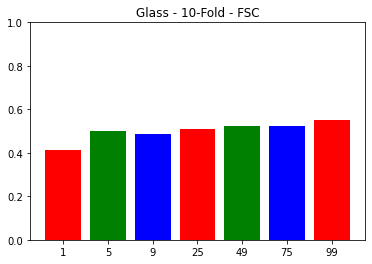

In [43]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = bag_for_estimators_nb(data_X, data_y, folds, est_list)
    print('K =', fold_num)
    for ests in est_list:
        accs[ests] = utils.get_accuracy(data_y, y_preds[ests])
        precs[ests] = utils.get_precision(data_y, y_preds[ests])
        recs[ests] = utils.get_recall(data_y, y_preds[ests])
        fscrs[ests] = utils.get_FSC(data_y, y_preds[ests])
        
        if tex:
            # to .tex table
            print('  ', ests, '&', accs[ests], '&', precs[ests], \
                  '&', recs[ests], '&', fscrs[ests], '\\\\')
            #print('&', fscrs[ests])
        else:
            print('\tNnum of estimators =', ests, 'FSC =', fscrs[ests])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='estims', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   1 & 0.852 & 0.853 & 0.852 & 0.853 \\
   5 & 0.857 & 0.86 & 0.857 & 0.858 \\
   9 & 0.919 & 0.92 & 0.919 & 0.919 \\
   25 & 0.89 & 0.895 & 0.89 & 0.892 \\
   49 & 0.914 & 0.919 & 0.914 & 0.915 \\
   75 & 0.89 & 0.9 & 0.89 & 0.892 \\
   99 & 0.9 & 0.905 & 0.9 & 0.901 \\
K = 5
   1 & 0.886 & 0.885 & 0.886 & 0.885 \\
   5 & 0.867 & 0.868 & 0.867 & 0.867 \\
   9 & 0.929 & 0.928 & 0.929 & 0.928 \\
   25 & 0.914 & 0.915 & 0.914 & 0.914 \\
   49 & 0.914 & 0.914 & 0.914 & 0.914 \\
   75 & 0.914 & 0.914 & 0.914 & 0.914 \\
   99 & 0.919 & 0.919 & 0.919 & 0.919 \\
K = 10
   1 & 0.876 & 0.876 & 0.876 & 0.876 \\
   5 & 0.895 & 0.895 & 0.895 & 0.895 \\
   9 & 0.91 & 0.909 & 0.91 & 0.909 \\
   25 & 0.914 & 0.914 & 0.914 & 0.914 \\
   49 & 0.919 & 0.919 & 0.919 & 0.919 \\
   75 & 0.919 & 0.919 & 0.919 & 0.919 \\
   99 & 0.919 & 0.919 & 0.919 & 0.919 \\


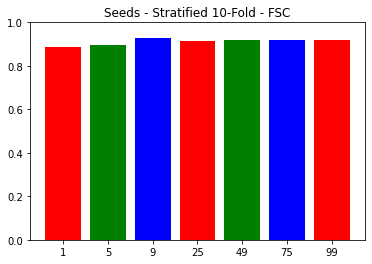

In [68]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = bag_for_estimators_nb(data_X, data_y, folds, est_list)
    print('K =', fold_num)
    for ests in est_list:
        accs[ests] = utils.get_accuracy(data_y, y_preds[ests])
        precs[ests] = utils.get_precision(data_y, y_preds[ests])
        recs[ests] = utils.get_recall(data_y, y_preds[ests])
        fscrs[ests] = utils.get_FSC(data_y, y_preds[ests])
        
        if tex:
            # to .tex table
            print('  ', ests, '&', accs[ests], '&', precs[ests], \
                  '&', recs[ests], '&', fscrs[ests], '\\\\')
            #print('&', fscrs[ests])
        else:
            print('\tNnum of estimators =', ests, 'FSC =', fscrs[ests])

    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='estims', show=show_plots, save=True)

### FSC whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [69]:
fold_nums = [2, 5, 10]
bootstrap = [True, False]
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   True & 0.196 & 0.055 & 0.092 & 0.069 \\
   False & 0.206 & 0.062 & 0.096 & 0.076 \\
K = 5
   True & 0.262 & 0.135 & 0.168 & 0.143 \\
   False & 0.234 & 0.127 & 0.176 & 0.138 \\
K = 10
   True & 0.495 & 0.384 & 0.379 & 0.381 \\
   False & 0.453 & 0.37 & 0.373 & 0.37 \\


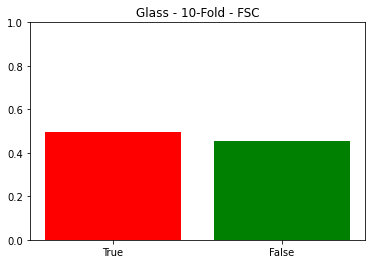

In [46]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for bs in bootstrap:
        classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=bs)
        y_pred = bag_for_params(data_X, data_y, classifier, folds)
        
        accs[bs] = utils.get_accuracy(data_y, y_pred)
        precs[bs] = utils.get_precision(data_y, y_pred)
        recs[bs] = utils.get_recall(data_y, y_pred)
        fscrs[bs] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', bs, '&', accs[bs], '&', precs[bs], \
                  '&', recs[bs], '&', fscrs[bs], '\\\\')
            #print('  ', bs, '&', fscrs[bs], '\\\\')
        else:
            print('\tBootstrap =', bs, 'FSC =', fscrs[bs])

    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='bootstrap', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   True & 0.848 & 0.864 & 0.848 & 0.851 \\
   False & 0.876 & 0.878 & 0.876 & 0.877 \\
K = 5
   True & 0.919 & 0.919 & 0.919 & 0.919 \\
   False & 0.89 & 0.89 & 0.89 & 0.89 \\
K = 10
   True & 0.919 & 0.92 & 0.919 & 0.919 \\
   False & 0.895 & 0.895 & 0.895 & 0.895 \\


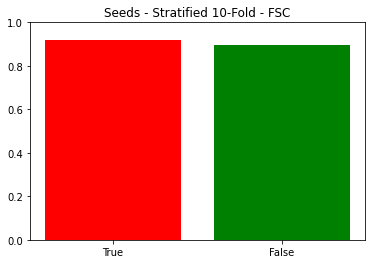

In [70]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for bs in bootstrap:
        classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=bs)
        y_pred = bag_for_params(data_X, data_y, classifier, folds)
        
        accs[bs] = utils.get_accuracy(data_y, y_pred)
        precs[bs] = utils.get_precision(data_y, y_pred)
        recs[bs] = utils.get_recall(data_y, y_pred)
        fscrs[bs] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', bs, '&', accs[bs], '&', precs[bs], \
                  '&', recs[bs], '&', fscrs[bs], '\\\\')
            #print('  ', bs, '&', fscrs[bs], '\\\\')
        else:
            print('\tBootstrap =', bs, 'FSC =', fscrs[bs])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='bootstrap', show=show_plots, save=True)

### FSC for different number of samples to draw from X to train each base estimator

In [71]:
fold_nums = [2, 5, 10]
max_samples_list = [0.25, 0.5, 0.75, 1.0]
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   0.25 & 0.229 & 0.053 & 0.107 & 0.071 \\
   0.5 & 0.234 & 0.055 & 0.11 & 0.073 \\
   0.75 & 0.22 & 0.054 & 0.103 & 0.071 \\
   1.0 & 0.159 & 0.047 & 0.075 & 0.058 \\
K = 5
   0.25 & 0.285 & 0.136 & 0.159 & 0.143 \\
   0.5 & 0.234 & 0.113 & 0.145 & 0.123 \\
   0.75 & 0.28 & 0.128 & 0.166 & 0.14 \\
   1.0 & 0.271 & 0.148 & 0.194 & 0.157 \\
K = 10
   0.25 & 0.481 & 0.33 & 0.333 & 0.329 \\
   0.5 & 0.444 & 0.337 & 0.267 & 0.28 \\
   0.75 & 0.5 & 0.379 & 0.36 & 0.367 \\
   1.0 & 0.519 & 0.387 & 0.377 & 0.378 \\


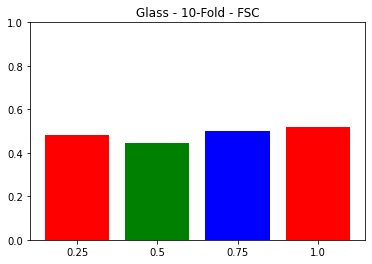

In [49]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for max_samples in max_samples_list:
        classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=max_samples)
        y_pred = bag_for_params(data_X, data_y, classifier, folds)
        
        accs[max_samples] = utils.get_accuracy(data_y, y_pred)
        precs[max_samples] = utils.get_precision(data_y, y_pred)
        recs[max_samples] = utils.get_recall(data_y, y_pred)
        fscrs[max_samples] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', max_samples, '&', accs[max_samples], '&', precs[max_samples], \
                  '&', recs[max_samples], '&', fscrs[max_samples], '\\\\')
            #print('  ', max_samples, '&', fscrs[max_samples], '\\\\')
        else:
            print('\tMax samples =', max_samples, 'FSC =', fscrs[max_samples])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='max_samples', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='max_samples', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='max_samples', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='max_samples', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   0.25 & 0.833 & 0.851 & 0.833 & 0.837 \\
   0.5 & 0.871 & 0.882 & 0.871 & 0.873 \\
   0.75 & 0.91 & 0.915 & 0.91 & 0.911 \\
   1.0 & 0.924 & 0.924 & 0.924 & 0.924 \\
K = 5
   0.25 & 0.876 & 0.887 & 0.876 & 0.878 \\
   0.5 & 0.876 & 0.882 & 0.876 & 0.878 \\
   0.75 & 0.905 & 0.904 & 0.905 & 0.904 \\
   1.0 & 0.905 & 0.906 & 0.905 & 0.905 \\
K = 10
   0.25 & 0.876 & 0.879 & 0.876 & 0.877 \\
   0.5 & 0.929 & 0.929 & 0.929 & 0.929 \\
   0.75 & 0.919 & 0.919 & 0.919 & 0.919 \\
   1.0 & 0.91 & 0.909 & 0.91 & 0.909 \\


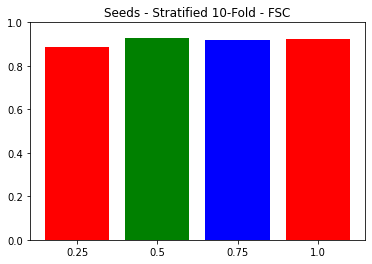

In [72]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for max_samples in max_samples_list:
        classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=max_samples)
        y_pred = bag_for_params(data_X, data_y, classifier, folds)
        
        accs[max_samples] = utils.get_accuracy(data_y, y_pred)
        precs[max_samples] = utils.get_precision(data_y, y_pred)
        recs[max_samples] = utils.get_recall(data_y, y_pred)
        fscrs[max_samples] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', max_samples, '&', accs[max_samples], '&', precs[max_samples], \
                  '&', recs[max_samples], '&', fscrs[max_samples], '\\\\')
            #print('  ', max_samples, '&', fscrs[max_samples], '\\\\')
        else:
            print('\tMax samples =', max_samples, 'FSC =', fscrs[max_samples])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='max_samples', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='max_samples', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='max_samples', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='max_samples', show=show_plots, save=True)

In [51]:
ds_name

'Glass'